In [1]:
from pysb import *
from pysb.macros import *

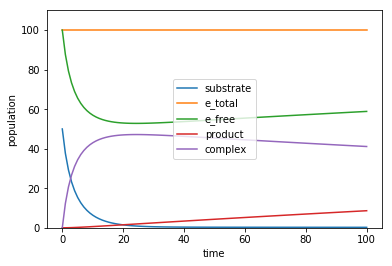

In [7]:
Model()

Monomer('enzyme', ['binding1'])
Monomer('protein', ['binding', 'state'], {'state': ['sub','pro']})

Parameter('kf',0.003)
Parameter('kr',0.001)
Parameter('kc',0.002)

Rule('binding', enzyme(binding1=None) + protein(state='sub', binding=None)
     <> enzyme(binding1=1) % protein(state='sub', binding=1), kf, kr)

Rule('dissociation', enzyme(binding1=1) % protein(state='sub', binding=1) 
     >> enzyme(binding1=None) + protein(state='pro', binding=None), kc)

Parameter('enzyme_0', 100)
Parameter('protein_0', 50)
Initial(enzyme(binding1=None), enzyme_0 )
Initial(protein(binding=None, state='sub') , protein_0)

Observable('e_total', enzyme())
Observable('e_free', enzyme(binding1=None))
Observable('substrate', protein(binding=None, state='sub'))
Observable('product', protein(binding=None, state='pro'))
Observable('complex', enzyme(binding1=1) % 
           protein(binding=1, state='sub'))

%matplotlib inline
from pysb.integrate import odesolve
import matplotlib.pyplot as plt
import numpy as np

tspan = np.linspace(0, 100, 100)
y = odesolve(model, tspan)

plt.plot(tspan, y['substrate'], label="substrate")
plt.plot(tspan, y['e_total'], label="e_total")
plt.plot(tspan, y['e_free'], label="e_free")
plt.plot(tspan, y['product'], label="product")
plt.plot(tspan, y['complex'], label="complex")
plt.xlabel('time')
plt.ylabel('population')
plt.ylim(0,110)
plt.legend(loc=10)
plt.show()